# Day 16: Building Neural Networks with PyTorch - From Theory to Practice

**Welcome to Day 16 of your ML journey!** Today we transition from understanding neural network theory to building them in practice using **PyTorch**, one of the most popular and powerful deep learning frameworks. You'll learn to create, train, and evaluate neural networks for real-world problems.

---

**Goal:** Master PyTorch fundamentals and build your first neural network from scratch, understanding the complete workflow from data preparation to model deployment.

**Topics Covered:**
- PyTorch fundamentals: tensors, autograd, and neural network modules
- Building neural networks with nn.Module and nn.Sequential
- Training loops: forward pass, loss calculation, backpropagation
- Data handling with DataLoader and Dataset classes
- Model evaluation and visualization techniques
- Best practices for neural network development
- Real-world classification and regression examples


---

## 1. Concept Overview

### What is PyTorch?

**PyTorch** is an open-source machine learning library developed by Facebook's AI Research lab. It's designed to be intuitive, flexible, and efficient for both research and production use. PyTorch has become the framework of choice for many researchers and practitioners due to its dynamic computation graph and Pythonic interface.

**Key Advantages of PyTorch:**
1. **Dynamic Computation Graphs**: Build and modify networks on-the-fly
2. **Pythonic Design**: Feels natural to Python developers
3. **Strong Community**: Extensive ecosystem and pre-trained models
4. **Production Ready**: TorchScript for deployment optimization
5. **Research Friendly**: Easy experimentation and rapid prototyping

### Core PyTorch Components

| Component | Purpose | Key Features |
|-----------|---------|--------------|
| **Tensors** | Multi-dimensional arrays | GPU acceleration, automatic differentiation |
| **Autograd** | Automatic differentiation | Gradient computation, backpropagation |
| **nn.Module** | Neural network building blocks | Reusable layers, parameter management |
| **Optimizers** | Training algorithms | SGD, Adam, RMSprop, and more |
| **Loss Functions** | Training objectives | Cross-entropy, MSE, custom losses |

### Neural Network Architecture in PyTorch

**Building Blocks:**
- **Input Layer**: Receives your data
- **Hidden Layers**: Learn complex patterns (fully connected, convolutional, etc.)
- **Activation Functions**: Introduce non-linearity (ReLU, sigmoid, tanh)
- **Output Layer**: Produces predictions
- **Loss Function**: Measures prediction quality
- **Optimizer**: Updates model parameters

**Real-World Applications:**
- **Image Classification**: Recognizing objects in photos
- **Natural Language Processing**: Sentiment analysis, text generation
- **Time Series Forecasting**: Stock prices, weather prediction
- **Recommendation Systems**: Personalized content suggestions


---

## 2. Code Demo: PyTorch Fundamentals

Let's start by exploring PyTorch's core components and building our first neural network.


### 2.1 Environment Setup and Imports


In [5]:
# Import essential libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configure matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Check PyTorch version and device availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    print("Using CPU")

print(f"Device: {device}")


PyTorch version: 2.9.0+cpu
CUDA available: False
Using CPU
Device: cpu


### 2.2 Understanding PyTorch Tensors

Tensors are the fundamental data structure in PyTorch - think of them as multi-dimensional arrays with GPU acceleration and automatic differentiation capabilities.


In [7]:
# Create tensors from different sources
print("=== Creating Tensors ===")

# From Python list
tensor_from_list = torch.tensor([1, 2, 3, 4, 5])
print(f"From list: {tensor_from_list}")

# From NumPy array
numpy_array = np.array([[1, 2], [3, 4]])
tensor_from_numpy = torch.from_numpy(numpy_array)
print(f"From NumPy:\n{tensor_from_numpy}")

# Random tensors
random_tensor = torch.randn(3, 4)  # Normal distribution
uniform_tensor = torch.rand(2, 3)  # Uniform distribution [0, 1]
print(f"Random normal (3x4):\n{random_tensor}")
print(f"Random uniform (2x3):\n{uniform_tensor}")

# Tensor operations
print("\n=== Tensor Operations ===")
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print(f"Matrix A:\n{a}")
print(f"Matrix B:\n{b}")
print(f"A + B:\n{a + b}")
print(f"A * B (element-wise):\n{a * b}")
print(f"A @ B (matrix multiplication):\n{a @ b}")
print(f"A.shape: {a.shape}")
print(f"A.dtype: {a.dtype}")


=== Creating Tensors ===
From list: tensor([1, 2, 3, 4, 5])
From NumPy:
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
Random normal (3x4):
tensor([[-0.3267, -0.2788, -0.4220, -1.3323],
        [-0.3639,  0.1513, -0.3514, -0.7906],
        [-0.0915,  0.2352,  2.2440,  0.5817]])
Random uniform (2x3):
tensor([[0.6440, 0.7071, 0.6581],
        [0.4913, 0.8913, 0.1447]])

=== Tensor Operations ===
Matrix A:
tensor([[1., 2.],
        [3., 4.]])
Matrix B:
tensor([[5., 6.],
        [7., 8.]])
A + B:
tensor([[ 6.,  8.],
        [10., 12.]])
A * B (element-wise):
tensor([[ 5., 12.],
        [21., 32.]])
A @ B (matrix multiplication):
tensor([[19., 22.],
        [43., 50.]])
A.shape: torch.Size([2, 2])
A.dtype: torch.float32


### 2.3 Automatic Differentiation with Autograd

PyTorch's autograd system automatically computes gradients, which is essential for training neural networks.


In [8]:
# Understanding autograd
print("=== Automatic Differentiation ===")

# Create tensors with requires_grad=True for gradient computation
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

print(f"x = {x}, w = {w}, b = {b}")

# Define a simple function: y = w*x + b
y = w * x + b
print(f"y = w*x + b = {y}")

# Compute gradients
y.backward()

print(f"\nGradients:")
print(f"dy/dx = {x.grad}")  # Should be 3.0 (w)
print(f"dy/dw = {w.grad}")  # Should be 2.0 (x)
print(f"dy/db = {b.grad}")  # Should be 1.0

# More complex example: y = x^2 + 2x + 1
print("\n=== Complex Function Example ===")
x2 = torch.tensor(3.0, requires_grad=True)
y2 = x2**2 + 2*x2 + 1
print(f"y = x² + 2x + 1 = {y2}")

y2.backward()
print(f"dy/dx = {x2.grad}")  # Should be 2*3 + 2 = 8

=== Automatic Differentiation ===
x = 2.0, w = 3.0, b = 1.0
y = w*x + b = 7.0

Gradients:
dy/dx = 3.0
dy/dw = 2.0
dy/db = 1.0

=== Complex Function Example ===
y = x² + 2x + 1 = 16.0
dy/dx = 8.0


### 2.4 Building Your First Neural Network

Now let's build a simple neural network for binary classification using the classic approach.


In [10]:
# Generate synthetic dataset for binary classification
print("=== Dataset Preparation ===")

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_clusters_per_class=1,
    random_state=42
)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).unsqueeze(1)  # Add dimension for batch processing

print(f"Dataset shape: {X_tensor.shape}")
print(f"Target shape: {y_tensor.shape}")
print(f"Class distribution: {np.bincount(y)}")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


=== Dataset Preparation ===
Dataset shape: torch.Size([1000, 20])
Target shape: torch.Size([1000, 1])
Class distribution: [497 503]

Training set: 800 samples
Test set: 200 samples


In [11]:
# Method 1: Building Neural Network using nn.Module (Recommended)
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input to hidden
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Hidden to hidden
        self.fc3 = nn.Linear(hidden_size, output_size)  # Hidden to output
        
        # Dropout for regularization
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Forward pass through the network
        x = F.relu(self.fc1(x))  # First hidden layer with ReLU
        x = self.dropout(x)      # Apply dropout
        x = F.relu(self.fc2(x))  # Second hidden layer with ReLU
        x = self.dropout(x)      # Apply dropout
        x = torch.sigmoid(self.fc3(x))  # Output layer with sigmoid
        return x

# Create model instance
model = SimpleNeuralNetwork(
    input_size=20,    # Number of features
    hidden_size=64,   # Hidden layer size
    output_size=1     # Binary classification
)

print("=== Neural Network Architecture ===")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")


=== Neural Network Architecture ===
SimpleNeuralNetwork(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 5,569
Trainable parameters: 5,569


In [12]:
# Method 2: Building Neural Network using nn.Sequential (Alternative)
sequential_model = nn.Sequential(
    nn.Linear(20, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

print("=== Sequential Model ===")
print(sequential_model)

# Both models have the same architecture
print(f"\nSequential model parameters: {sum(p.numel() for p in sequential_model.parameters()):,}")


=== Sequential Model ===
Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=64, out_features=64, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=64, out_features=1, bias=True)
  (7): Sigmoid()
)

Sequential model parameters: 5,569


### 2.5 Weight Initialization Strategies

**Why Weight Initialization Matters:**
Proper weight initialization is crucial for neural network training. Poor initialization can lead to:
- **Vanishing Gradients**: Weights too small → gradients become tiny
- **Exploding Gradients**: Weights too large → gradients become huge
- **Dead Neurons**: All weights negative → ReLU never activates

**Industry Standard:** Xavier/Glorot initialization for sigmoid/tanh, He initialization for ReLU

=== Weight Initialization Comparison ===

DEFAULT Initialization:
  Total parameters: 5,569
  First layer weight stats:
    Mean: -0.0022
    Std:  0.1299
    Min:  -0.2233
    Max:  0.2232

XAVIER Initialization:
  Total parameters: 5,569
  First layer weight stats:
    Mean: -0.0010
    Std:  0.1535
    Min:  -0.2670
    Max:  0.2669

HE Initialization:
  Total parameters: 5,569
  First layer weight stats:
    Mean: -0.0014
    Std:  0.3192
    Min:  -0.5471
    Max:  0.5476

UNIFORM Initialization:
  Total parameters: 5,569
  First layer weight stats:
    Mean: 0.0019
    Std:  0.0579
    Min:  -0.1000
    Max:  0.1000


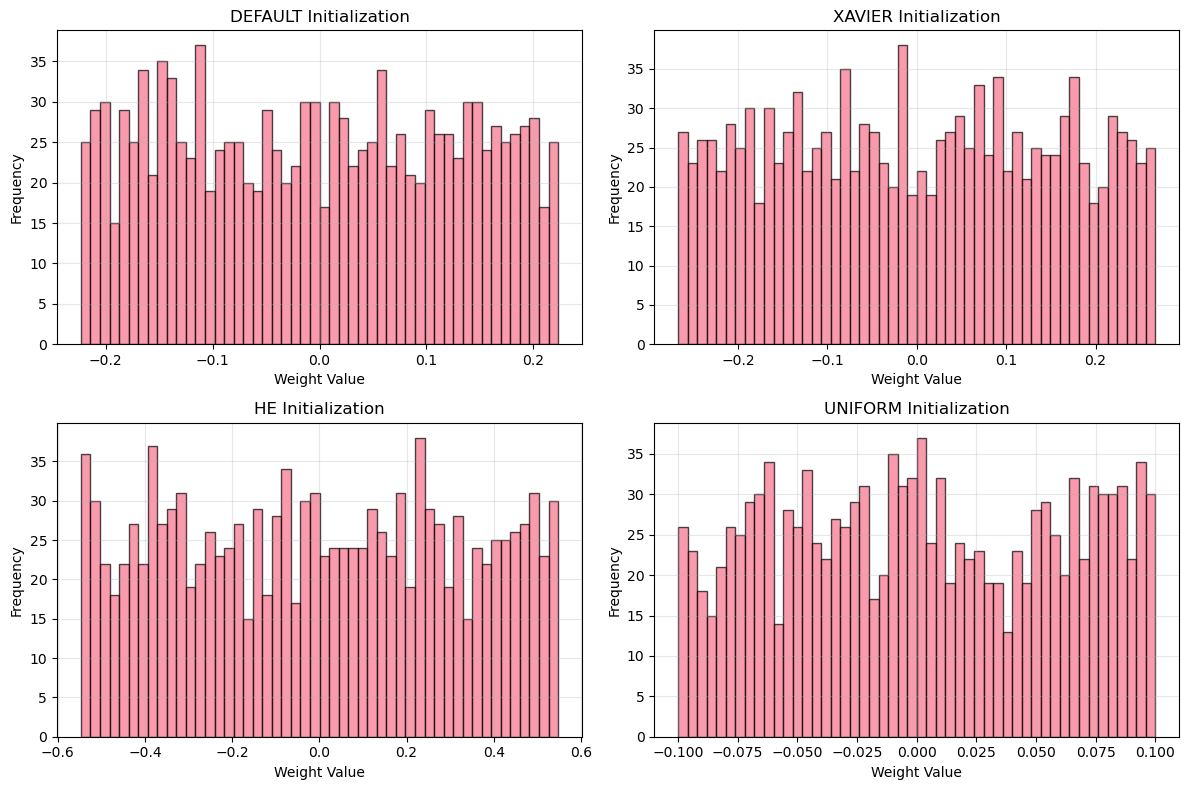


**Key Insight:** He initialization (Kaiming) is optimal for ReLU networks!


In [13]:
# Weight Initialization Strategies Comparison
print("=== Weight Initialization Comparison ===")

def create_model_with_init(init_method):
    """Create a model with specific weight initialization"""
    model = nn.Sequential(
        nn.Linear(20, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 1),
        nn.Sigmoid()
    )
    
    # Apply weight initialization
    if init_method == "default":
        pass  # Use PyTorch defaults
    elif init_method == "xavier":
        for layer in model:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)
    elif init_method == "he":
        for layer in model:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
                nn.init.zeros_(layer.bias)
    elif init_method == "uniform":
        for layer in model:
            if isinstance(layer, nn.Linear):
                nn.init.uniform_(layer.weight, -0.1, 0.1)
                nn.init.zeros_(layer.bias)
    
    return model

# Test different initialization methods
init_methods = ["default", "xavier", "he", "uniform"]
models = {}

for method in init_methods:
    model = create_model_with_init(method)
    models[method] = model
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f"\n{method.upper()} Initialization:")
    print(f"  Total parameters: {total_params:,}")
    
    # Show weight statistics
    first_layer_weights = list(model.parameters())[0]
    print(f"  First layer weight stats:")
    print(f"    Mean: {first_layer_weights.mean().item():.4f}")
    print(f"    Std:  {first_layer_weights.std().item():.4f}")
    print(f"    Min:  {first_layer_weights.min().item():.4f}")
    print(f"    Max:  {first_layer_weights.max().item():.4f}")

# Visualize weight distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, method in enumerate(init_methods):
    first_layer_weights = list(models[method].parameters())[0].detach().numpy().flatten()
    axes[i].hist(first_layer_weights, bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{method.upper()} Initialization')
    axes[i].set_xlabel('Weight Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n**Key Insight:** He initialization (Kaiming) is optimal for ReLU networks!")


### 2.6 Batch Normalization: Training Stability

**What is Batch Normalization?**
Batch normalization standardizes inputs to each layer, making training more stable and faster.

**Benefits:**
- **Faster Convergence**: Enables higher learning rates
- **Reduced Sensitivity**: Less dependent on weight initialization
- **Regularization Effect**: Reduces overfitting
- **Gradient Flow**: Prevents vanishing/exploding gradients

**Important:** BatchNorm behaves differently during training vs inference!

In [14]:
# Batch Normalization Comparison
print("=== Batch Normalization vs Standard Network ===")

# Model without BatchNorm
class StandardNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StandardNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Model with BatchNorm
class BatchNormNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BatchNormNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))  # Apply BatchNorm before activation
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Create both models
standard_model = StandardNetwork(20, 64, 1).to(device)
batchnorm_model = BatchNormNetwork(20, 64, 1).to(device)

print("Standard Network Architecture:")
print(standard_model)
print(f"\nParameters: {sum(p.numel() for p in standard_model.parameters()):,}")

print("\nBatchNorm Network Architecture:")
print(batchnorm_model)
print(f"\nParameters: {sum(p.numel() for p in batchnorm_model.parameters()):,}")

# Apply He initialization to both models
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
        nn.init.zeros_(m.bias)

standard_model.apply(init_weights)
batchnorm_model.apply(init_weights)

print("\nBoth models initialized with He initialization")


=== Batch Normalization vs Standard Network ===
Standard Network Architecture:
StandardNetwork(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Parameters: 5,569

BatchNorm Network Architecture:
BatchNormNetwork(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Parameters: 5,825

Both models initialized with He initialization


### 2.7 Training with Advanced Techniques

Now let's train our models and compare their performance with advanced optimization techniques.

In [ ]:
# Advanced Training Setup with Learning Rate Scheduling
print("=== Advanced Training Setup ===")

# Setup for both models
models_to_train = {
    'Standard': standard_model,
    'BatchNorm': batchnorm_model
}

results = {}

for model_name, model in models_to_train.items():
    print(f"\n--- Training {model_name} Model ---")
    
    # Reset model weights
    model.apply(init_weights)
    
    # Setup optimizer and scheduler
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)  # Higher LR for BatchNorm
    
    # Learning rate scheduler - reduces LR when loss plateaus
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=10
    )
    
    # Training loop with advanced features
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    learning_rates = []
    
    criterion = nn.BCELoss()
    
    for epoch in range(100):
        # Training phase
        model.train()
        
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass with gradient clipping
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        # Calculate training accuracy
        with torch.no_grad():
            train_pred = (outputs > 0.5).float()
            train_acc = (train_pred == y_train).float().mean()
        
        # Evaluation phase
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_pred = (test_outputs > 0.5).float()
            test_acc = (test_pred == y_test).float().mean()
        
        # Learning rate scheduling
        scheduler.step(test_loss)
        
        # Store metrics
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
        train_accuracies.append(train_acc.item())
        test_accuracies.append(test_acc.item())
        learning_rates.append(optimizer.param_groups[0]['lr'])
        
        # Print progress every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/100], '
                  f'Train Loss: {loss.item():.4f}, Train Acc: {train_acc.item():.4f}, '
                  f'Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc.item():.4f}, '
                  f'LR: {optimizer.param_groups[0]["lr"]:.6f}')
    
    # Store results
    results[model_name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'learning_rates': learning_rates,
        'final_test_acc': test_accuracies[-1],
        'final_test_loss': test_losses[-1]
    }

print("\nTraining completed for both models!")


=== Advanced Training Setup ===

--- Training Standard Model ---


TypeError: ReduceLROnPlateau.__init__() got an unexpected keyword argument 'verbose'